<a href="https://colab.research.google.com/github/igcampos/Predictive-Maintenance/blob/master/Project_Rocket_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto Rocket Science Inc.

## Aprendizado
Esse projeto teve o intuito principal de auxiliar no aprendizado sobre a utilização de machine learning na manutenção preditiva de máquinas e equipamentos.

O projeto foi utilizado para trabalhar alguns pacotes do statsmodel e como fazer uma análise de resíduos. Além da utilização de alguns modelos do tipo ensemble como Extratrees e Árvore de decisão para predição e feature engineering, respectivamente.  


## Sumário

* Entendimento do Negócio
* Introdução
* Objetivo
* Data Wrangling
* Análise Exploratória
* Baseline
* Feature Engineering
* Pré-processamento
* Modelos de Predição
* Conclusão

## Entendimento do Negócio
Será criado uma simulação de negócio onde a empresa Rocket Science Inc. está querendo predizer as manutenções de seu maquinário através de leituras temporais de sensores. 

Os dados foram retirados do kaggle para salientar a simulação de negócio. 

https://www.kaggle.com/darkside92/turbofan-predictive-maintenance-nasa


###Introdução

A Rocket Science Inc é uma empresa multinacional que produz peças para a construção de satélites. As peças são produzidos por uma fábrica com 18 linhas de produção. 

Cada linha de produção é composta por uma sequência de máquinas operatrizes, que realizam 10 operações, desde o material bruto até a peça acabada.
As máquinas possuem muitas partes móveis que funcionam com ar pneumático e motores elétricos. 

O sucesso da empresa Rocket Science Inc é diretamente relacionado ao tempo em que as máquinas permanecem operando, ou seja, as máquinas não podem ficar fora de operação, quebradas aguardando manutenção.

Para garantir o funcionamento ininterrupto das máquinas, o time de manutenção da Rocket Science Inc., realiza manutenções periódicas programadas, a fim de substituir peças gastas, lubrificar as partes móveis e checar a vida útil de motores elétricos, tudo isso para evitar a quebra repentina.

Como um Data Scientist, fui contratado pela Rocket Science Inc. para prever quando ocorrerá a falha em um motor elétrico.


### Objetivo

**Quantos ciclos cada motor ainda possui até a falha?**

### Data Wrangling 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df_data = pd.read_csv('/content/drive/My Drive/Colab/train_FD001.txt', delim_whitespace=True,header=None)
df_target = pd.read_csv('/content/drive/My Drive/Colab/RUL_FD001.txt', header=None)
df_test  = pd.read_csv('/content/drive/My Drive/Colab/test_FD001.txt', delim_whitespace=True,header=None)

In [ ]:
df_data.columns = ['engine_id','cycle','setting_1','setting_2','setting_3','sensor_1','sensor_2','sensor_3','sensor_4','sensor_5','sensor_6','sensor_7',
                   'sensor_8','sensor_9','sensor_10','sensor_11','sensor_12','sensor_13','sensor_14','sensor_15','sensor_16','sensor_17','sensor_18', 
                   'sensor_19','sensor_20','sensor_21']


df_test.columns = ['engine_id','cycle','setting_1','setting_2','setting_3','sensor_1','sensor_2','sensor_3','sensor_4','sensor_5','sensor_6','sensor_7',
                   'sensor_8','sensor_9','sensor_10','sensor_11','sensor_12','sensor_13','sensor_14','sensor_15','sensor_16','sensor_17','sensor_18', 
                   'sensor_19','sensor_20','sensor_21']

**Análise dos dados de treino**

In [ ]:
df_data.head()

,engine_id,cycle,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   engine_id  20631 non-null  int64  
 1   cycle      20631 non-null  int64  
 2   setting_1  20631 non-null  float64
 3   setting_2  20631 non-null  float64
 4   setting_3  20631 non-null  float64
 5   sensor_1   20631 non-null  float64
 6   sensor_2   20631 non-null  float64
 7   sensor_3   20631 non-null  float64
 8   sensor_4   20631 non-null  float64
 9   sensor_5   20631 non-null  float64
 10  sensor_6   20631 non-null  float64
 11  sensor_7   20631 non-null  float64
 12  sensor_8   20631 non-null  float64
 13  sensor_9   20631 non-null  float64
 14  sensor_10  20631 non-null  float64
 15  sensor_11  20631 non-null  float64
 16  sensor_12  20631 non-null  float64
 17  sensor_13  20631 non-null  float64
 18  sensor_14  20631 non-null  float64
 19  sensor_15  20631 non-null  float64
 20  sensor

In [ ]:
df_data.isnull().sum()

engine_id    0
cycle        0
setting_1    0
setting_2    0
setting_3    0
sensor_1     0
sensor_2     0
sensor_3     0
sensor_4     0
sensor_5     0
sensor_6     0
sensor_7     0
sensor_8     0
sensor_9     0
sensor_10    0
sensor_11    0
sensor_12    0
sensor_13    0
sensor_14    0
sensor_15    0
sensor_16    0
sensor_17    0
sensor_18    0
sensor_19    0
sensor_20    0
sensor_21    0
dtype: int64

Sem dados faltantes

Adição da variável target nos dados de treino.

In [ ]:
df_data['RUL'] = df_data.groupby(['engine_id'])['cycle'].transform(max) - df_data['cycle']
df_data.RUL[:10]

0    191
1    190
2    189
3    188
4    187
5    186
6    185
7    184
8    183
9    182
Name: RUL, dtype: int64

**Análise dos dados de teste**

In [ ]:
df_test.head()

,engine_id,cycle,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [ ]:
df_target.head()

,0
0,112
1,98
2,69
3,82
4,91


In [ ]:
df_target.columns = ['RUL']

In [ ]:
df_target['engine_id'] = df_target.index + 1

In [ ]:
df_target.head()

,RUL,engine_id
0,112,1
1,98,2
2,69,3
3,82,4
4,91,5


In [ ]:
rul = pd.DataFrame(df_test.groupby('engine_id')['cycle'].max()).reset_index()
rul.columns = ['engine_id','max']

In [ ]:
rul.head()

,engine_id,max
0,1,31
1,2,49
2,3,126
3,4,106
4,5,98


In [ ]:
df_target['RUL_max'] = df_target['RUL'] + rul['max']
df_target.drop('RUL', axis=1, inplace=True)
df_target.head()

,engine_id,RUL_max
0,1,143
1,2,147
2,3,195
3,4,188
4,5,189


In [ ]:
df_test = df_test.merge(df_target, on='engine_id',how='left')
df_test.head()

,engine_id,cycle,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL_max
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,143
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,143
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,143
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,143
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,143


In [ ]:
df_test['RUL'] = df_test['RUL_max'] - df_test['cycle']
df_test.drop('RUL_max', axis=1, inplace=True)
df_test.head()

,engine_id,cycle,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,142
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,141
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,140
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,139
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,138


### Análise Exploratória

In [ ]:
df_data.describe()

,engine_id,cycle,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,21.609803,553.367711,2388.096652,9065.242941,1.300000e+00,47.541168,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,107.807862
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,0.001389,0.885092,0.070985,22.082880,4.660829e-13,0.267087,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251,68.880990
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,21.600000,549.850000,2387.900000,9021.730000,1.300000e+00,46.850000,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,0.000000
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,21.610000,552.810000,2388.050000,9053.100000,1.300000e+00,47.350000,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,51.000000
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,21.610000,553.440000,2388.090000,9060.660000,1.300000e+00,47.510000,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,103.000000
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,21.610000,554.010000,2388.140000,9069.420000,1.300000e+00,47.700000,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,155.000000
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,21.610000,556.060000,2388.560000,9244.590000,1.300000e+00,48.530000,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,361.000000


Pode se verificar que alguns sensores não sofrem variação ao longo do tempo.
Como as colunas setting_3, sensor_1, sensor_5, sensor_6, sensor_10, sensor_16, sensor_18 e sensor_19.

**Distribuição dos Valores**

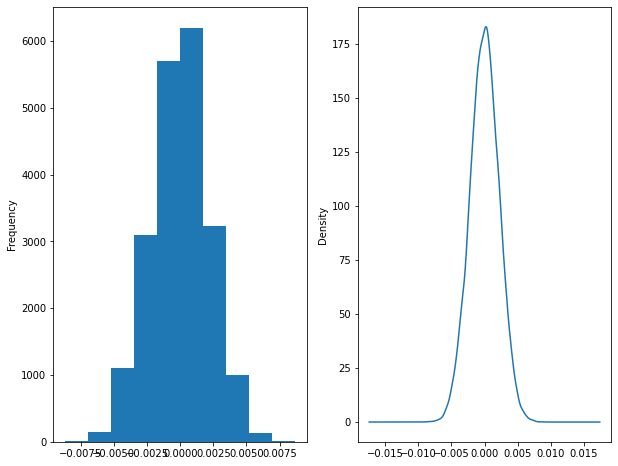

In [ ]:
# Distribuição da coluna setting_1
fig = plt.figure(figsize=(10,8))

ax0 =fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

df_data['setting_1'].plot(kind='hist',
                          ax=ax0
                          )

df_data['setting_1'].plot(kind='kde',
                          ax=ax1
                          )

plt.show()

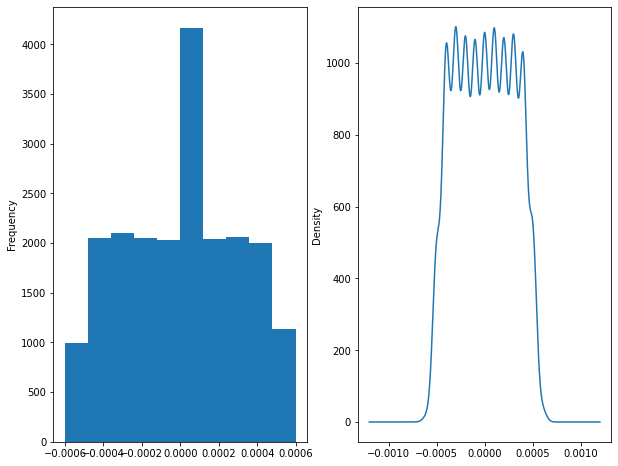

In [ ]:
# Distribuição da coluna setting_2
fig = plt.figure(figsize=(10,8))

ax0 =fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

df_data['setting_2'].plot(kind='hist',
                          ax=ax0
                          )

df_data['setting_2'].plot(kind='kde',
                          ax=ax1
                          )

plt.show()

Nesse coluna a distribuição dos valores não são de acordo com a distribuição normal, devido as variações de cada id na coluna engine_id. 


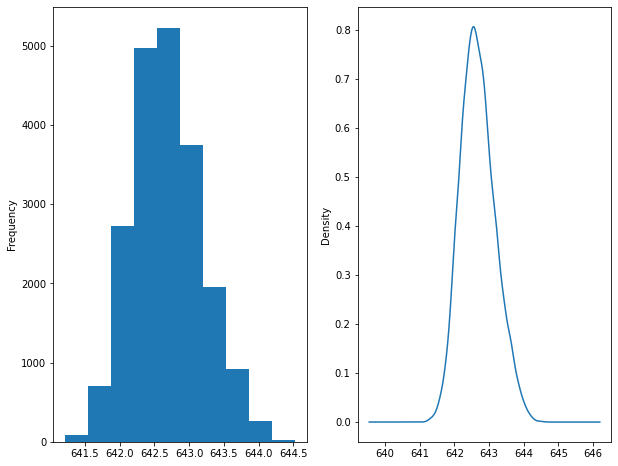

In [ ]:
# Distribuição da coluna sensor_2
fig = plt.figure(figsize=(10,8))

ax0 =fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

df_data['sensor_2'].plot(kind='hist',
                          ax=ax0
                          )

df_data['sensor_2'].plot(kind='kde',
                          ax=ax1
                          )

plt.show()

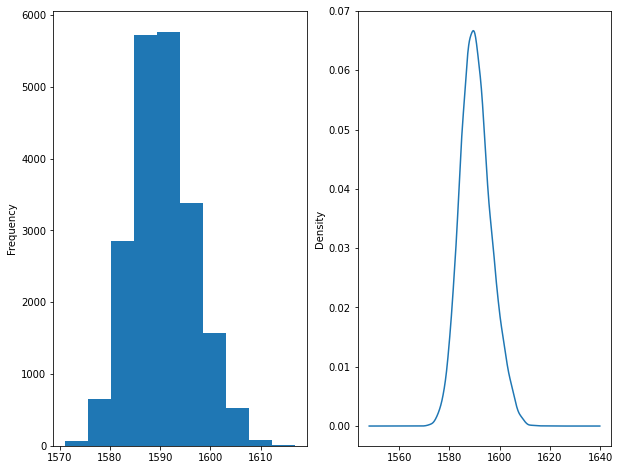

In [ ]:
# Distribuição da coluna sensor_3
fig = plt.figure(figsize=(10,8))

ax0 =fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

df_data['sensor_3'].plot(kind='hist',
                          ax=ax0
                          )

df_data['sensor_3'].plot(kind='kde',
                          ax=ax1
                          )

plt.show()

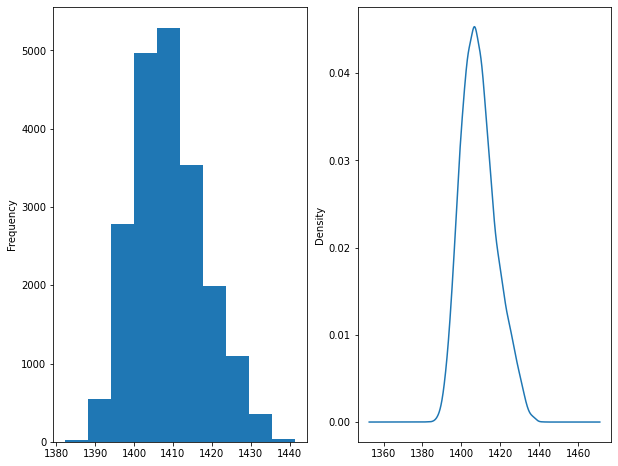

In [ ]:
# Distribuição da coluna sensor_4
fig = plt.figure(figsize=(10,8))

ax0 =fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

df_data['sensor_4'].plot(kind='hist',
                          ax=ax0
                          )

df_data['sensor_4'].plot(kind='kde',
                          ax=ax1
                          )

plt.show()


Essa coluna tem uma tendência positiva ao longo da média, mas mantêm a característica da distribuição normal. 

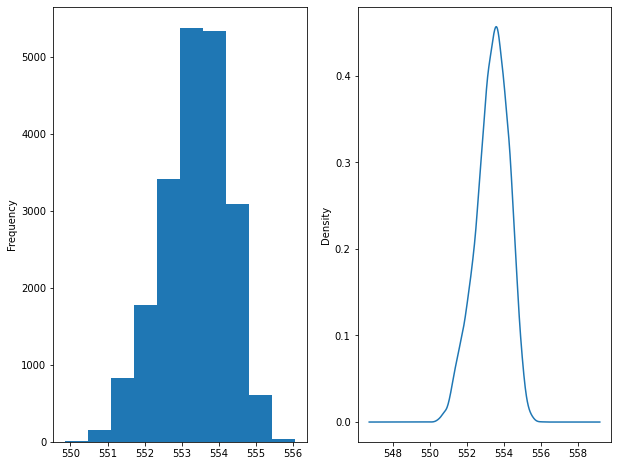

In [ ]:
# Distribuição da coluna sensor_7
fig = plt.figure(figsize=(10,8))

ax0 =fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

df_data['sensor_7'].plot(kind='hist',
                          ax=ax0
                          )

df_data['sensor_7'].plot(kind='kde',
                          ax=ax1
                          )

plt.show()


Essa coluna tem uma tendência negativa ao longo da média, mas mantêm a característica da distribuição normal. 

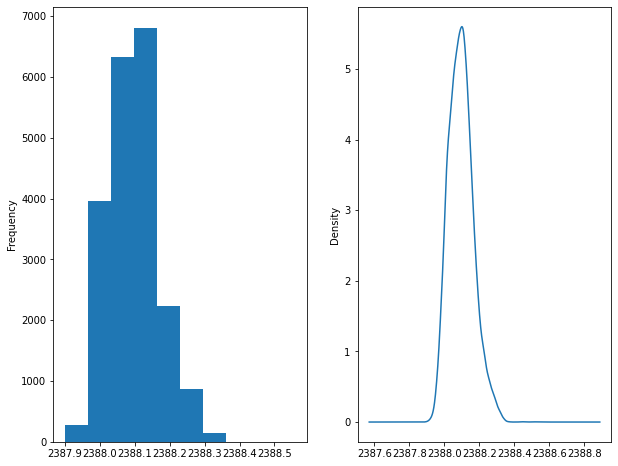

In [ ]:
# Distribuição da coluna sensor_8
fig = plt.figure(figsize=(10,8))

ax0 =fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

df_data['sensor_8'].plot(kind='hist',
                          ax=ax0
                          )

df_data['sensor_8'].plot(kind='kde',
                          ax=ax1
                          )

plt.show()


Essa coluna tem uma tendência positiva ao longo da média, mas mantêm a característica da distribuição normal. 

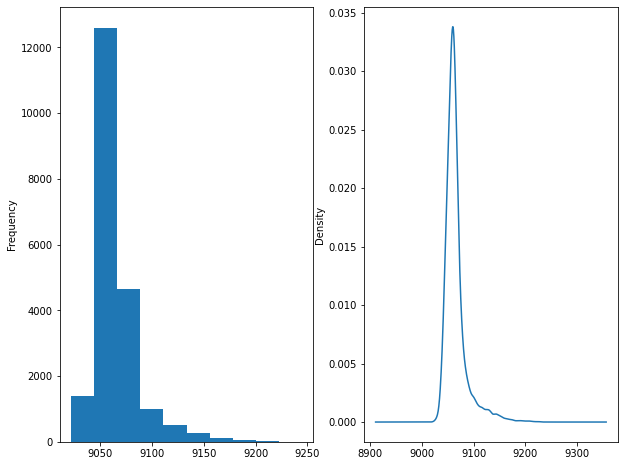

In [ ]:
# Distribuição da coluna sensor_9
fig = plt.figure(figsize=(10,8))

ax0 =fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

df_data['sensor_9'].plot(kind='hist',
                          ax=ax0
                          )

df_data['sensor_9'].plot(kind='kde',
                          ax=ax1
                          )

plt.show()

Nessa coluna há um deslocamento positivo e portanto é necessário fazer um ajuste nos dados para padronizar os dados da coluna. 

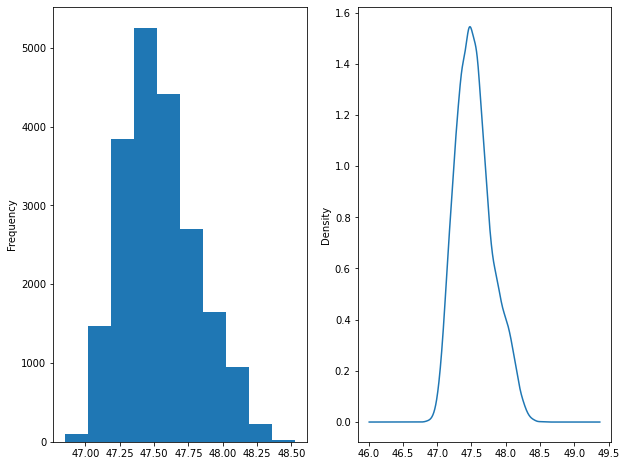

In [ ]:
# Distribuição da coluna sensor_11
fig = plt.figure(figsize=(10,8))

ax0 =fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

df_data['sensor_11'].plot(kind='hist',
                          ax=ax0
                          )

df_data['sensor_11'].plot(kind='kde',
                          ax=ax1
                          )

plt.show()

Nessa coluna há um pequeno deslocamento positivo, mantendo a característica normal.

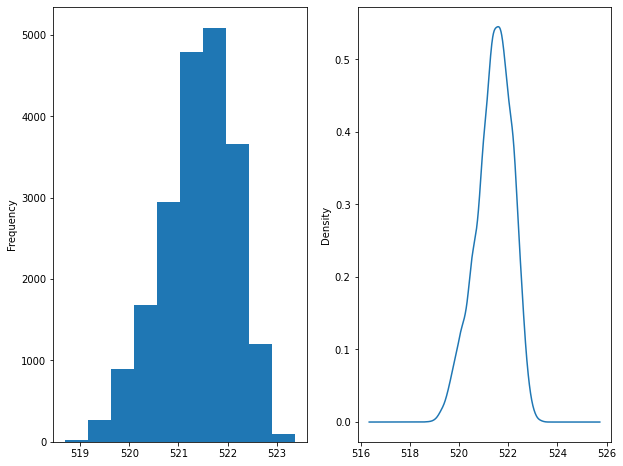

In [ ]:
# Distribuição da coluna sensor_12
fig = plt.figure(figsize=(10,8))

ax0 =fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

df_data['sensor_12'].plot(kind='hist',
                          ax=ax0
                          )

df_data['sensor_12'].plot(kind='kde',
                          ax=ax1
                          )

plt.show()

Nessa coluna há um pequeno deslocamento negativo, mantendo a característica normal.

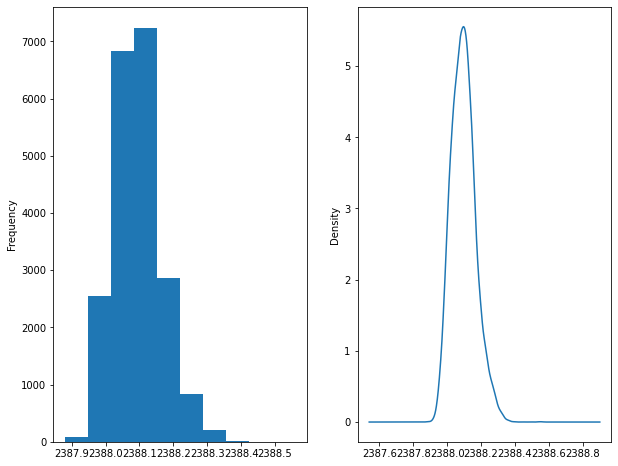

In [ ]:
# Distribuição da coluna sensor_13
fig = plt.figure(figsize=(10,8))

ax0 =fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

df_data['sensor_13'].plot(kind='hist',
                          ax=ax0
                          )

df_data['sensor_13'].plot(kind='kde',
                          ax=ax1
                          )

plt.show()

Nessa coluna há um pequeno deslocamento positivo, mantendo a característica normal.

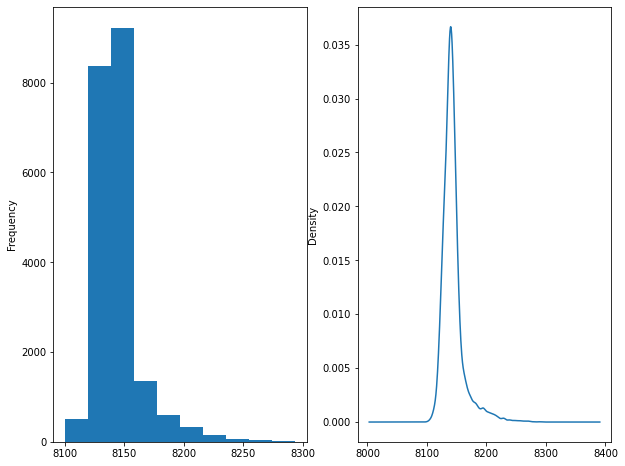

In [ ]:
# Distribuição da coluna sensor_14
fig = plt.figure(figsize=(10,8))

ax0 =fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

df_data['sensor_14'].plot(kind='hist',
                          ax=ax0
                          )

df_data['sensor_14'].plot(kind='kde',
                          ax=ax1
                          )

plt.show()

Nessa coluna existe um deslocamento positivo, e portanto é necessário fazer um ajuste nos dados para padronizar os dados da coluna.

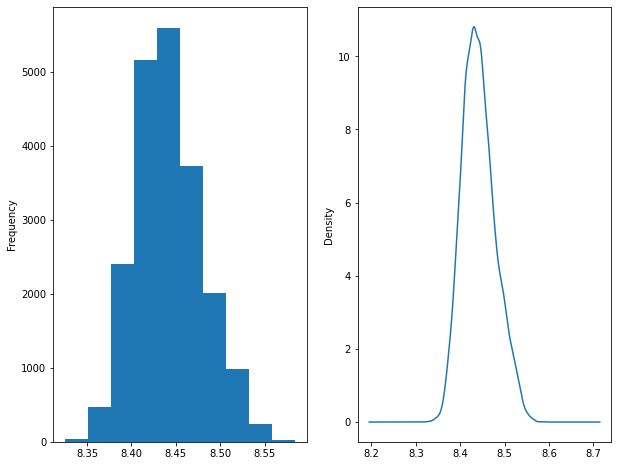

In [ ]:
# Distribuição da coluna sensor_15
fig = plt.figure(figsize=(10,8))

ax0 =fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

df_data['sensor_15'].plot(kind='hist',
                          ax=ax0
                          )

df_data['sensor_15'].plot(kind='kde',
                          ax=ax1
                          )

plt.show()

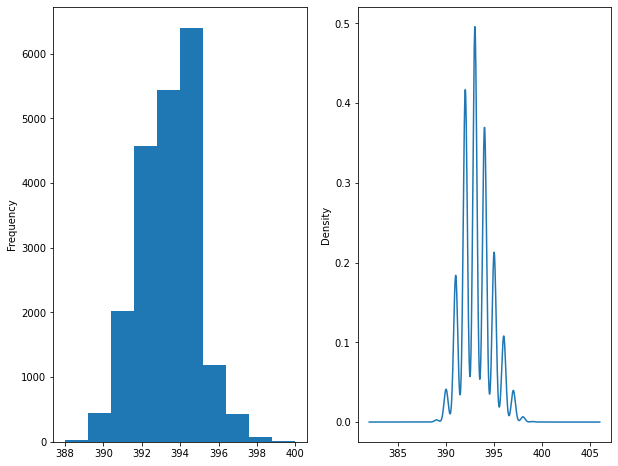

In [ ]:
# Distribuição da coluna sensor_17
fig = plt.figure(figsize=(10,8))

ax0 =fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

df_data['sensor_17'].plot(kind='hist',
                          ax=ax0
                          )

df_data['sensor_17'].plot(kind='kde',
                          ax=ax1
                          )

plt.show()

Nessa coluna existe uma diferença, notada no gráfico mais a direita, em relação as demais, onde há distribuições sobrepostas em um mesmo gráfico. É possível que para cada unidade de máquina aja uma distribuição específica.

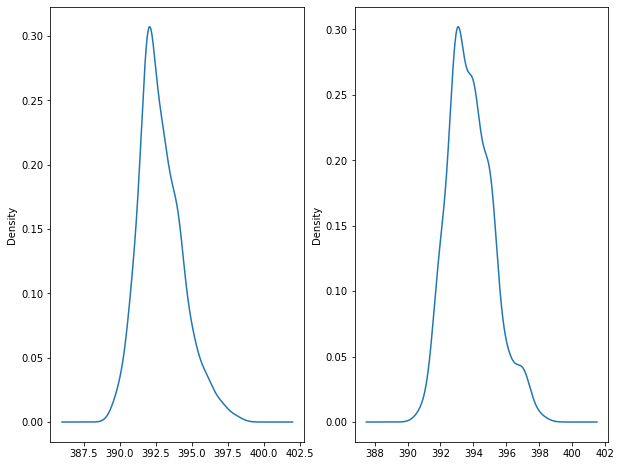

In [ ]:
fig = plt.figure(figsize=(10,8))

ax0 =fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

df_data[df_data['engine_id'] == 1].sensor_17.plot(kind='kde',
                                                  ax=ax0
                                                  )

df_data[df_data['engine_id'] == 80].sensor_17.plot(kind='kde',
                                                 ax=ax1
                                                 )

plt.show()

Fazendo uma comparação entre cada elemento da coluna engine_id e o sensor_17, a hipotese levantada acima é corroborada. 

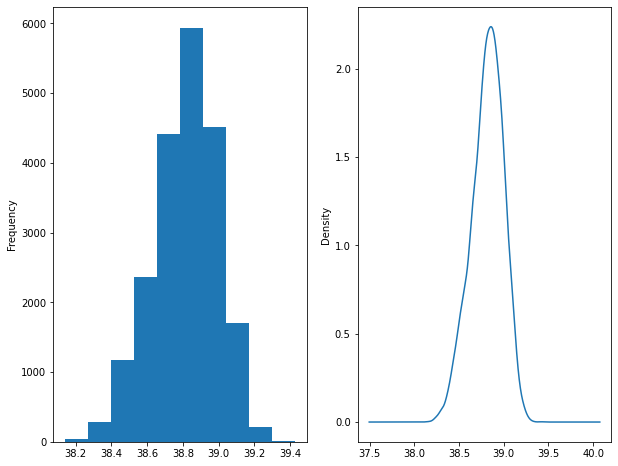

In [ ]:
# Distribuição da coluna sensor_20
fig = plt.figure(figsize=(10,8))

ax0 =fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

df_data['sensor_20'].plot(kind='hist',
                          ax=ax0
                          )

df_data['sensor_20'].plot(kind='kde',
                          ax=ax1
                          )

plt.show()

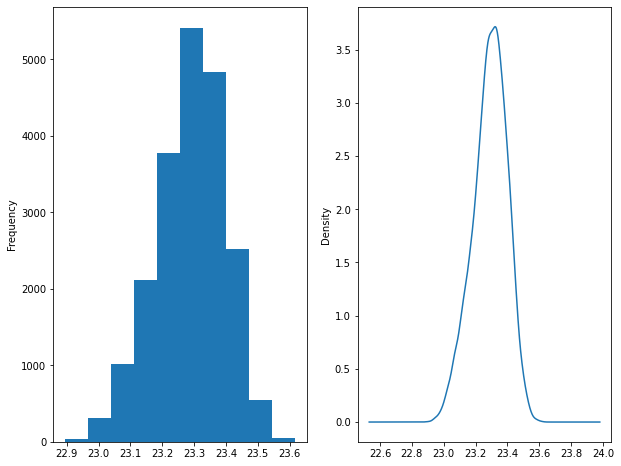

In [ ]:
# Distribuição da coluna sensor_21
fig = plt.figure(figsize=(10,8))

ax0 =fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

df_data['sensor_21'].plot(kind='hist',
                          ax=ax0
                          )

df_data['sensor_21'].plot(kind='kde',
                          ax=ax1
                          )

plt.show()

**Análise de Outliers**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


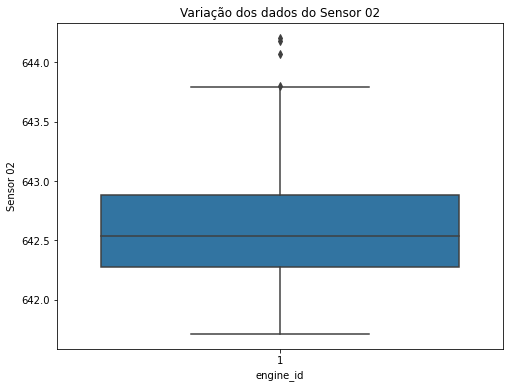

In [ ]:
plt.figure(figsize=(8,6))

ax0 =fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

sns.boxplot(x='engine_id', y='sensor_2', data=df_data.loc[df_data['engine_id'] == 1])

plt.title('Variação dos dados do Sensor 02')
plt.ylabel('Sensor 02')
plt.show()

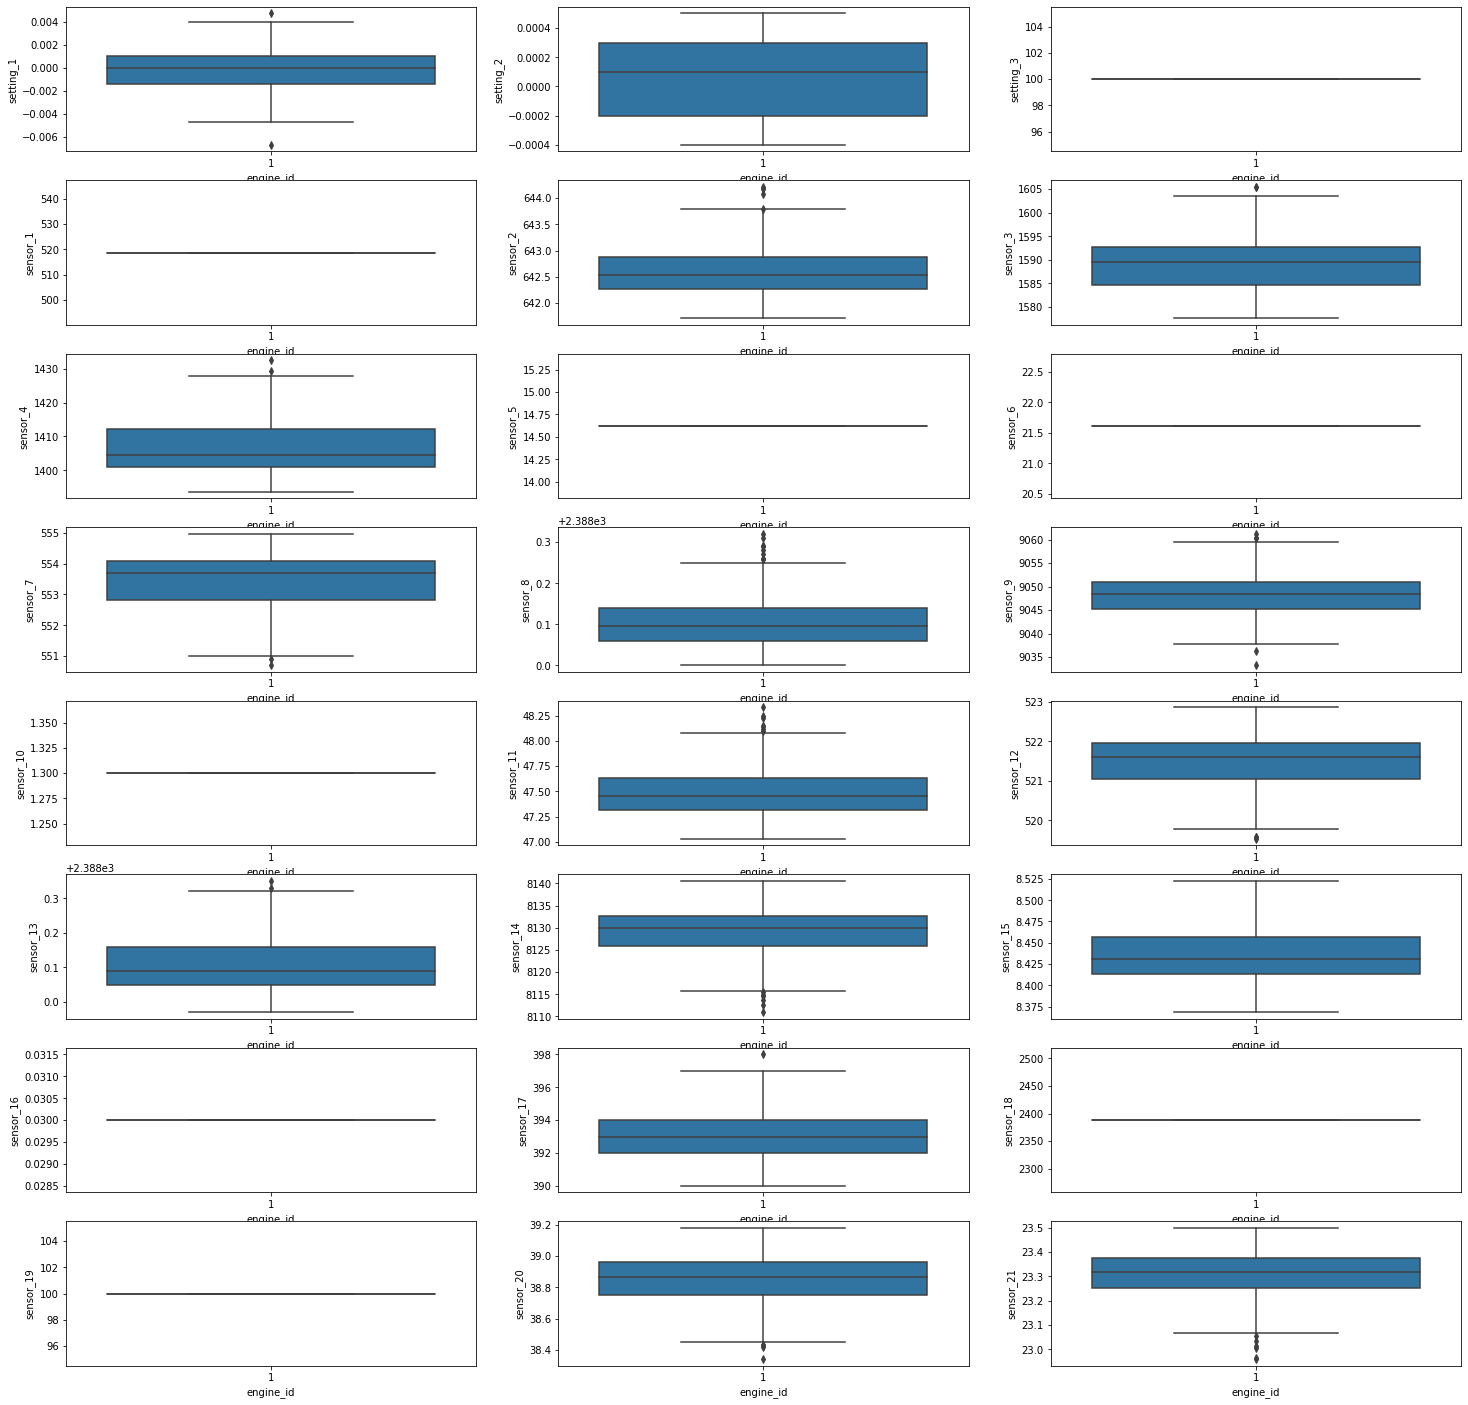

In [ ]:
# Análisando todas as colunas para a máquina 1 referente a coluna engine_id.
fig = plt.figure(figsize=(25,25))

ax0 = fig.add_subplot(8,3,1)
ax1= fig.add_subplot(8,3,2)
ax2= fig.add_subplot(8,3,3)
ax3= fig.add_subplot(8,3,4)
ax4= fig.add_subplot(8,3,5)
ax5= fig.add_subplot(8,3,6)
ax6= fig.add_subplot(8,3,7)
ax7= fig.add_subplot(8,3,8)
ax8= fig.add_subplot(8,3,9)
ax9= fig.add_subplot(8,3,10)
ax10= fig.add_subplot(8,3,11)
ax11= fig.add_subplot(8,3,12)
ax12= fig.add_subplot(8,3,13)
ax13 = fig.add_subplot(8,3,14)
ax14= fig.add_subplot(8,3,15)
ax15= fig.add_subplot(8,3,16)
ax16= fig.add_subplot(8,3,17)
ax17= fig.add_subplot(8,3,18)
ax18= fig.add_subplot(8,3,19)
ax19= fig.add_subplot(8,3,20)
ax20= fig.add_subplot(8,3,21)
ax21= fig.add_subplot(8,3,22)
ax22= fig.add_subplot(8,3,23)
ax23 = fig.add_subplot(8,3,24)


list_ax = [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16,ax17,ax18,ax19,ax20,ax21,ax22,ax23]

columns_df = df_data.columns.values[2:26]

for i, j in zip(columns_df, list_ax):
  sns.boxplot(x='engine_id', y=i, data=df_data.loc[df_data['engine_id'] == 1], ax=j)

plt.show()

Com esse gráfico podemos corroborar as hipóteses acima, primeiro sobre as variáveis que são constantes e segundo sobre a relação entre as distribuições e os outliers.

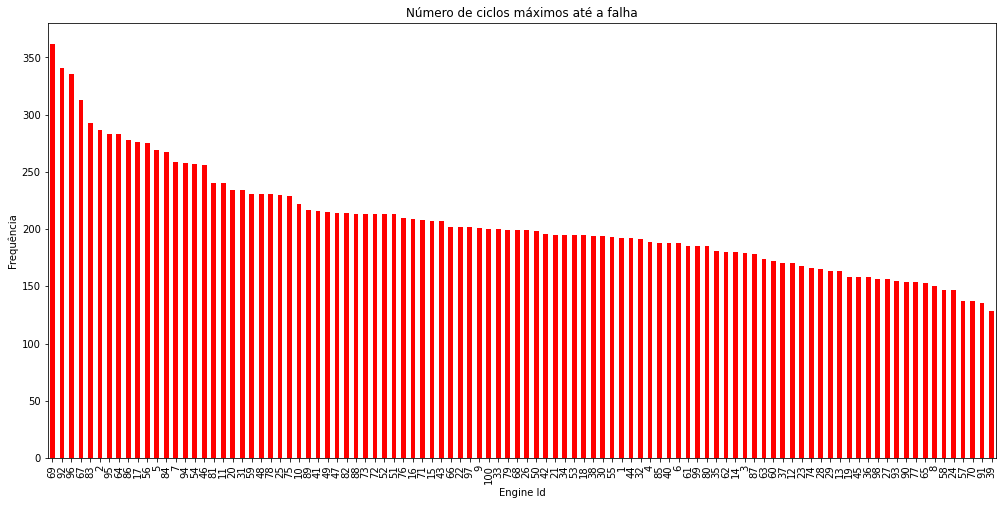

In [ ]:
df_data.engine_id.value_counts().plot.bar(figsize=(17,8),
                                          color= 'red'
                                          )

plt.title('Número de ciclos máximos até a falha')
plt.xlabel('Engine Id')
plt.ylabel('Frequência')

plt.show()


In [ ]:
df_max

,index,engine_id
0,69,362
1,92,341
2,96,336
3,67,313
4,83,293
...,...,...
95,24,147
96,57,137
97,70,137
98,91,135


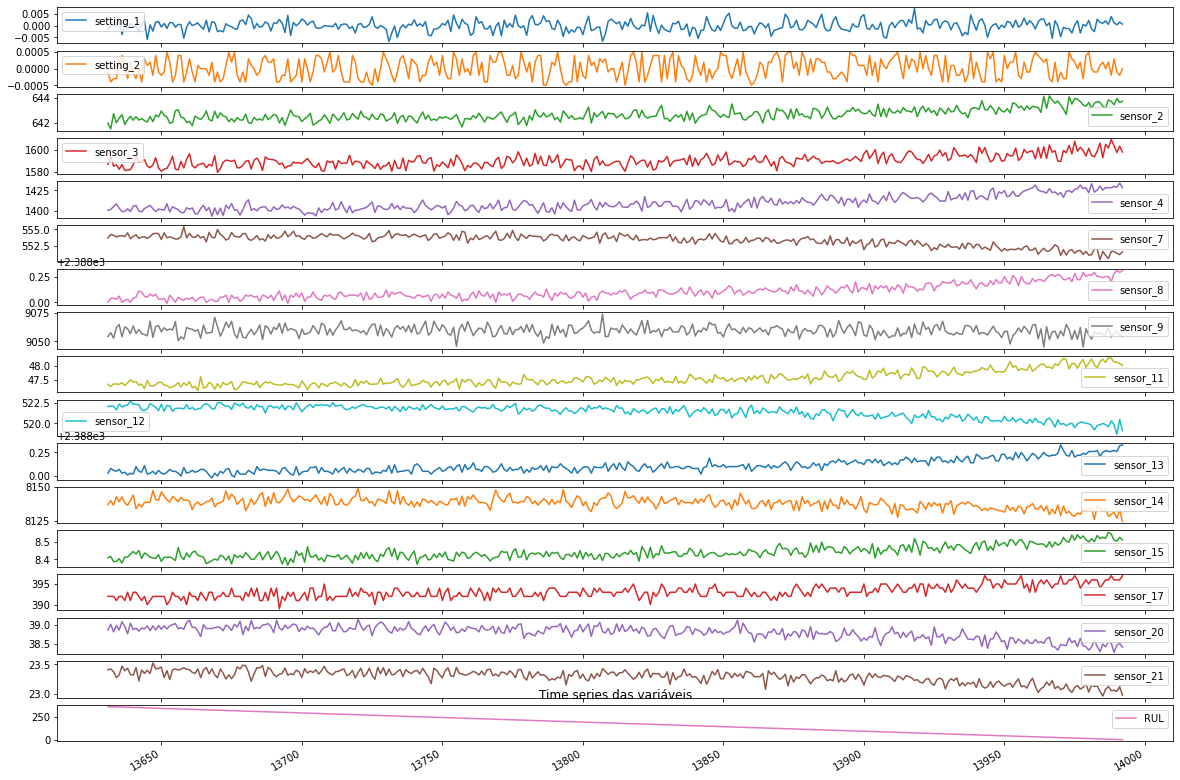

In [ ]:
df_id = df_data[df_data['engine_id'] == 69]
df_id[df_id.columns[2:]].plot(subplots=True, sharex=True, figsize=(20,15))

plt.title('Time series das variáveis')
plt.show()

### Baseline

Como baseline podemos fazer um modelo de predição de regressão multilinear com a variável alvo sendo o RUL, tendo como variáveis todas as colunas dos sensores e das configurações.

In [ ]:
df_data.head()

,engine_id,cycle,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


**Holdup**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_data.drop(['engine_id','cycle','RUL'],axis=1), df_data.RUL, test_size=0.3, random_state=42)

In [ ]:
x_train.shape, x_test.shape

((14441, 24), (6190, 24))

In [ ]:
y_train.shape, y_test.shape

((14441,), (6190,))

In [ ]:
#Criando a instância
MLR = LinearRegression()
#Trainando o modelo
MLR.fit(x_train,y_train)
#Calculando os novos valores com os dados de treino e teste
yhat = MLR.predict(x_test)
yhat_train = MLR.predict(x_train)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, yhat))
rmse_train = np.sqrt(mean_squared_error(y_train, yhat_train))

print(f'O valor de rmse do modelo baseline é:{rmse}')
print(f'O valor de rmse do modelo com os dados de treino é: {rmse_train}')

O valor de rmse do modelo baseline é:44.391979553133844
O valor de rmse do modelo com os dados de treino é: 44.79466870750213


In [ ]:
score = r2_score(y_test, yhat)
score_train = r2_score(y_train, yhat_train)

print(f'O valor do score do modelo baseline é:{score}')
print(f'O valor do score do modelo com os dados de treino é: {score_train}')

O valor do score do modelo baseline é:0.5697627492566507
O valor do score do modelo com os dados de treino é: 0.5831821177835822


### Feature Engineering

Primeiro será feito uma análise sem as variáveis estáticas. Para isso vamos retirar dos dados as colunas setting_3, sensor_1, sensor_5, sensor_6, sensor_10, sensor_16, sensor_18 e sensor_19.

In [ ]:
df_data.drop(['setting_3', 'sensor_1', 'sensor_5', 'sensor_6', 'sensor_10', 'sensor_16', 'sensor_18', 'sensor_19'], axis=1, inplace=True)
#df_data.drop(['setting_3', 'sensor_18', 'sensor_19'], axis=1, inplace=True)

**Heatmap**

In [ ]:
df_data.iloc[:, 2:].corr('pearson')

,setting_1,setting_2,sensor_2,sensor_3,sensor_4,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21,RUL
setting_1,1.000000,0.011660,0.009030,-0.005651,0.009544,-0.009437,-0.000427,-0.004279,0.011658,-0.001491,0.002318,-0.004469,0.007652,0.002599,-0.005713,-0.014559,-0.003198
setting_2,0.011660,1.000000,0.007266,0.009068,0.014673,-0.016678,0.013285,-0.005425,0.011690,-0.010923,0.018156,-0.006310,0.014156,0.012280,-0.010554,-0.007846,-0.001948
sensor_2,0.009030,0.007266,1.000000,0.602610,0.714949,-0.702136,0.662325,0.273764,0.740020,-0.724578,0.661792,0.179752,0.675975,0.629886,-0.661841,-0.668050,-0.606484
sensor_3,-0.005651,0.009068,0.602610,1.000000,0.678413,-0.664595,0.602481,0.322964,0.695900,-0.680307,0.600963,0.237137,0.639921,0.600017,-0.625941,-0.633901,-0.584520
sensor_4,0.009544,0.014673,0.714949,0.678413,1.000000,-0.793130,0.746852,0.297429,0.830136,-0.815591,0.745158,0.190748,0.758459,0.703499,-0.748067,-0.745193,-0.678948
sensor_7,-0.009437,-0.016678,-0.702136,-0.664595,-0.793130,1.000000,-0.767132,-0.217835,-0.822805,0.812713,-0.764611,-0.110053,-0.747051,-0.692893,0.736163,0.737447,0.657223
sensor_8,-0.000427,0.013285,0.662325,0.602481,0.746852,-0.767132,1.000000,-0.032091,0.782213,-0.786540,0.826084,-0.144787,0.700949,0.627785,-0.687030,-0.688840,-0.563968
sensor_9,-0.004279,-0.005425,0.273764,0.322964,0.297429,-0.217835,-0.032091,1.000000,0.274591,-0.210238,-0.034763,0.963157,0.293753,0.337110,-0.285280,-0.292795,-0.390102
sensor_11,0.011658,0.011690,0.740020,0.695900,0.830136,-0.822805,0.782213,0.274591,1.000000,-0.846884,0.780761,0.163408,0.780913,0.722296,-0.771510,-0.772554,-0.696228
sensor_12,-0.001491,-0.010923,-0.724578,-0.680307,-0.815591,0.812713,-0.786540,-0.210238,-0.846884,1.000000,-0.788441,-0.098141,-0.766052,-0.703485,0.751943,0.756263,0.671983


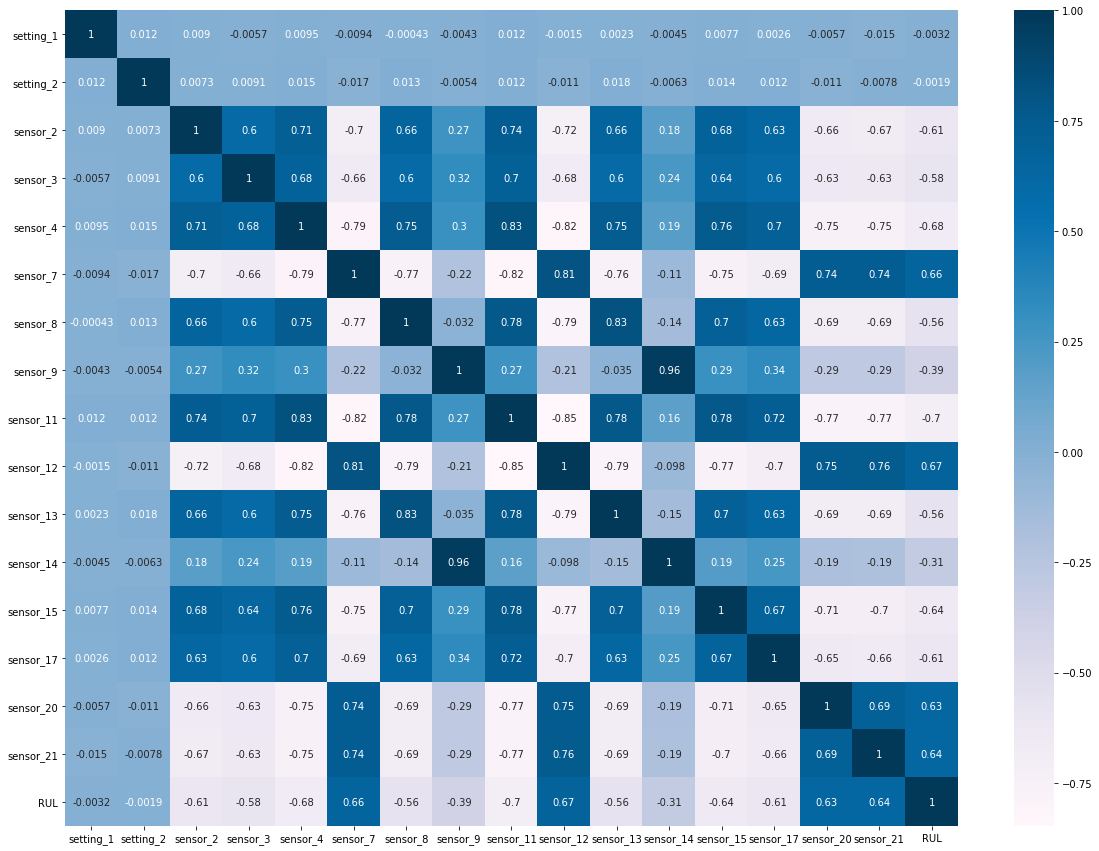

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df_data.iloc[:, 2:].corr('pearson'),annot=True, cmap= 'PuBu')

Através do método de correlação as colunas que tem uma correlação positiva com o RUL são sensor_7, sensor_12, sensor_20 e sensor_21.

E uma correlação negativa com a variável alvo são sensor_2, sensor_4, sensor_11,
sensor_15 e sensor_17.

**Árvore de Decisão**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model = DecisionTreeRegressor()
model.fit(df_data.drop(['engine_id','cycle','RUL'],axis=1), df_data.RUL)

importance = model.feature_importances_
importance

array([0.02391832, 0.01158467, 0.02956815, 0.02726218, 0.0804674 ,
       0.03977355, 0.01949294, 0.12878235, 0.44392745, 0.04105452,
       0.02182676, 0.03563558, 0.0335975 , 0.01012251, 0.02297225,
       0.03001388])

In [ ]:
df_importance = pd.DataFrame(importance)

df_importance.columns = ['importance']

df_importance['features'] = df_data.columns.values[2:18]

df_importance

,importance,features
0,0.023918,setting_1
1,0.011585,setting_2
2,0.029568,sensor_2
3,0.027262,sensor_3
4,0.080467,sensor_4
5,0.039774,sensor_7
6,0.019493,sensor_8
7,0.128782,sensor_9
8,0.443927,sensor_11
9,0.041055,sensor_12


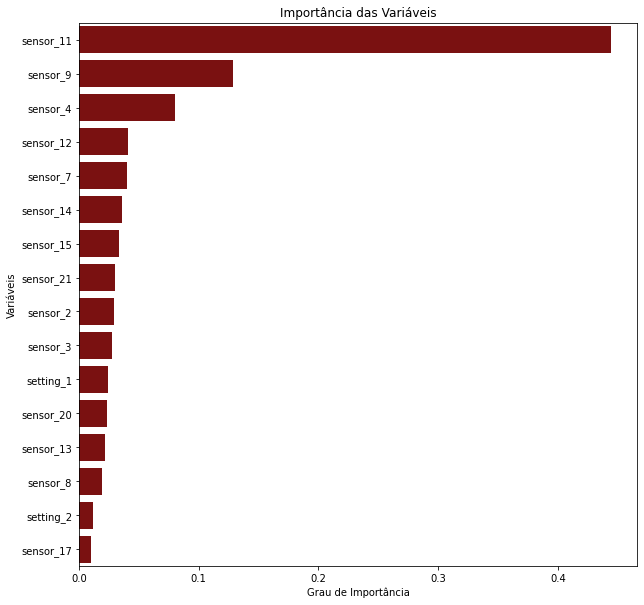

In [ ]:
plt.figure(figsize=(10,10))

sns.barplot(x='importance', y='features', orient='h', color='darkred',
            data=df_importance.sort_values(by='importance', ascending=False))

plt.title('Importância das Variáveis')
plt.ylabel('Variáveis')
plt.xlabel('Grau de Importância')
plt.show()

### Pré-processamento

Para tentar retirar os ruídos dos dados vai ser realizado a padronização dos dados com o método StandardScaler.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
x = df_data.iloc[:,2:18]
y = df_data.iloc[:,-1]

In [ ]:
x.head()

,setting_1,setting_2,sensor_2,sensor_3,sensor_4,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21
0,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044


In [ ]:
stand = StandardScaler()

x_stand = pd.DataFrame(stand.fit_transform(x))

x_stand.columns = ['setting_1','setting_2', 'sensor_2','sensor_3','sensor_4','sensor_7','sensor_8','sensor_9',
                   'sensor_11','sensor_12','sensor_13','sensor_14','sensor_15','sensor_17','sensor_20','sensor_21']




In [ ]:
x_stand.head()

,setting_1,setting_2,sensor_2,sensor_3,sensor_4,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21
0,-0.315980,-1.372953,-1.721725,-0.134255,-0.925936,1.121141,-0.516338,-0.862813,-0.266467,0.334262,-1.058890,-0.269071,-0.603816,-0.781710,1.348493,1.194427
1,0.872722,-1.031720,-1.061780,0.211528,-0.643726,0.431930,-0.798093,-0.958818,-0.191583,1.174899,-0.363646,-0.642845,-0.275852,-0.781710,1.016528,1.236922
2,-1.961874,1.015677,-0.661813,-0.413166,-0.525953,1.008155,-0.234584,-0.557139,-1.015303,1.364721,-0.919841,-0.551629,-0.649144,-2.073094,0.739891,0.503423
3,0.324090,-0.008022,-0.661813,-1.261314,-0.784831,1.222827,0.188048,-0.713826,-1.539489,1.961302,-0.224597,-0.520176,-1.971665,-0.781710,0.352598,0.777792
4,-0.864611,-0.690488,-0.621816,-1.251528,-0.301518,0.714393,-0.516338,-0.457059,-0.977861,1.052871,-0.780793,-0.521748,-0.339845,-0.136018,0.463253,1.059552


### Modelos de Predição

Na análise de predição iremos utilizar 6 modelos distintos sendo três modelos lineares, dois ensemble e um SVM. 

Para cada modelo serão testados os três conjuntos de feature engineering.  

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score

In [ ]:
xs1 = x_stand.loc[:, ['sensor_7', 'sensor_12', 'sensor_20', 'sensor_21']]
xs2 = x_stand.loc[:, ['sensor_2', 'sensor_4', 'sensor_11', 'sensor_15', 'sensor_17']]
xs3 = x_stand.loc[:, ['sensor_11', 'sensor_9', 'sensor_4', 'sensor_7', 'sensor_12', 'sensor_14', 'sensor_15', 'sensor_21']]
x_cross = x.loc[:, ['sensor_11', 'sensor_9', 'sensor_4', 'sensor_7', 'sensor_12', 'sensor_14', 'sensor_15', 'sensor_21']]

**Multi Linear Regression**

In [ ]:
x_after_standartization = x_stand.copy()

x_train, x_test, y_train, y_test = train_test_split(x_after_standartization, y, test_size=0.3, random_state=42)

reg = LinearRegression()
reg.fit(x_train, y_train)
yhat = reg.predict(x_test)
yhat_train = reg.predict(x_train)

print('O R2 score com os dados de teste é: {0:.2f}'.format(r2_score(y_test, yhat)))
print('O R2 score com os dados de treino é: {0:.2f}'.format(r2_score(y_train, yhat_train)))


O R2 score com os dados de teste é: 0.57
O R2 score com os dados de treino é: 0.58


In [ ]:
#Aplicando o método de cross validation
reg = LinearRegression()
scores = cross_val_score(reg, x_cross, y, cv=5)
print(f'O R2 score com cross validation é {scores.mean()}')

O R2 score com cross validation é 0.5651890318513185


In [ ]:
x_train_s1, x_test_s1, y_train_s1, y_test_s1 = train_test_split(xs1, y, test_size=0.3, random_state=42)
x_train_s2, x_test_s2, y_train_s2, y_test_s2 = train_test_split(xs2, y, test_size=0.3, random_state=42)
x_train_s3, x_test_s3, y_train_s3, y_test_s3 = train_test_split(xs3, y, test_size=0.3, random_state=42)


reg = LinearRegression()
#Primeiro teste
reg.fit(x_train_s1, y_train_s1)
yhat_s1 = reg.predict(x_test_s1)
yhat_s1_train = reg.predict(x_train_s1)

print('O R2 score do primeiro modelo com os dados de teste é: {0:.2f}'.format(r2_score(y_test_s1, yhat_s1)))
print('O R2 score do primeiro modelo com os dados de treino é: {0:.2f}'.format(r2_score( y_train_s1, yhat_s1_train)))
print('')

#Segundo teste
reg.fit(x_train_s2, y_train_s2)
yhat_s2 = reg.predict(x_test_s2)
yhat_s2_train = reg.predict(x_train_s2)

print('O R2 score do segundo modelo com os dados de teste é: {0:.2f}'.format(r2_score(y_test_s2, yhat_s2)))
print('O R2 score do segundo modelo com os dados de treino é: {0:.2f}'.format(r2_score(y_train_s2, yhat_s2_train)))
print('')

#Terceiro teste
reg.fit(x_train_s3, y_train_s3) 
yhat_s3 = reg.predict(x_test_s3)
yhat_s3_train = reg.predict(x_train_s3)
score_ml = r2_score(y_test_s3, yhat_s3)

print('O R2 score do terceiro modelo com os dados de teste é: {0:.2f}'.format(r2_score( y_test_s3, yhat_s3)))
print('O R2 score do terceiro modelo com os dados de treino é: {0:.2f}'.format(r2_score( y_train_s3, yhat_s3_train)))
print('')



O R2 score do primeiro modelo com os dados de teste é: 0.50
O R2 score do primeiro modelo com os dados de treino é: 0.53

O R2 score do segundo modelo com os dados de teste é: 0.53
O R2 score do segundo modelo com os dados de treino é: 0.54

O R2 score do terceiro modelo com os dados de teste é: 0.57
O R2 score do terceiro modelo com os dados de treino é: 0.58



Utilizando o método de pipeline

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
x_pipe = x.loc[:, ['sensor_11', 'sensor_9', 'sensor_4', 'sensor_7', 'sensor_12', 'sensor_14', 'sensor_15', 'sensor_21']]
x_train, x_test, y_train, y_test = train_test_split(x_pipe, y, test_size=0.3, random_state=42)

steps = [("standard", StandardScaler()), ("MLR", LinearRegression())]

pipe = Pipeline(steps)

pipe.fit(x_train,  y_train)
pipe.predict(x_test)

print(pipe.score(x_test, y_test))

0.5659047322231269


Utilizando o pacote statsmodels para realizar a análise dos residuos. 

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols  

In [ ]:
x = sm.add_constant(x_pipe)
model = sm.OLS(y,x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    RUL   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     3492.
Date:                Mon, 14 Sep 2020   Prob (F-statistic):               0.00
Time:                        23:52:31   Log-Likelihood:            -1.0776e+05
No. Observations:               20631   AIC:                         2.155e+05
Df Residuals:                   20622   BIC:                         2.156e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2786.5851    670.617     -4.155      0.0

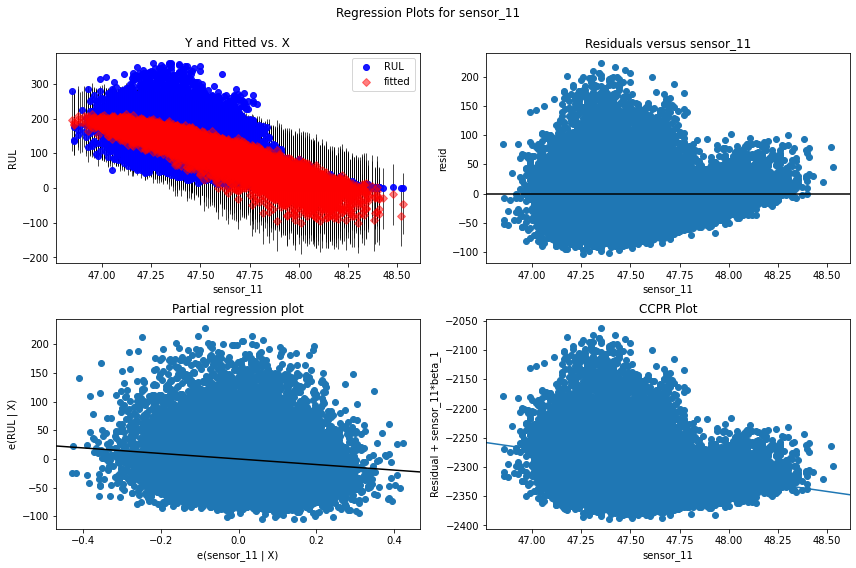

In [ ]:
#Gráfico de análise dos resíduos 
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'sensor_11', fig=fig)

Com esse resultado podemos verificar que dos três métodos de feature engineering, o com arvore de decisão, é a mais assertiva, porém o valor de r2 score do modelo não aumenta em relação a baseline. 

O método escolhido para diminuir o ruído dos dados, StandardScale, não afetou a performance do modelo. 

Analisando o gráfico dos resíduos para a variável com a maior importância do modelo, sensor_11, podemos verificar que os residuos estão demostrando um padrão, onde deveria ser uma distribuição normal e randomizada ao longo da média 0, portanto, o modelo não capturou alguma tendência nos dados.  

**Lasso Regression**

In [ ]:
#aplicando o método de Lasso Regression
from sklearn.model_selection import GridSearchCV

x_pipe = x.loc[:, ['sensor_11', 'sensor_9', 'sensor_4', 'sensor_7', 'sensor_12', 'sensor_14', 'sensor_15', 'sensor_21']]
x_train, x_test, y_train, y_test = train_test_split(x_pipe, y, test_size=0.3, random_state=42)

steps = [("standard", StandardScaler()), ("l1", Lasso(alpha=1))]

pipe = Pipeline(steps)

param = dict(l1__alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000 ])

grid = GridSearchCV(pipe, param_grid=param, cv=5)

grid.fit(x_train,y_train)
score_l1 = grid.best_score_

print('O R2 score do melhor alpha é: {0:.2f}'.format(grid.best_score_))
print('O melhor alpha:{}'.format(grid.best_estimator_))

O R2 score do melhor alpha é: 0.58
O melhor alpha:Pipeline(memory=None,
         steps=[('standard',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('l1',
                 Lasso(alpha=0.01, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)


**Ridge Regression**

In [ ]:
#aplicando o método de Ridge Regression

x_pipe = x.loc[:, ['sensor_11', 'sensor_9', 'sensor_4', 'sensor_7', 'sensor_12', 'sensor_14', 'sensor_15', 'sensor_21']]
x_train, x_test, y_train, y_test = train_test_split(x_pipe, y, test_size=0.3, random_state=42)

steps = [("standard", StandardScaler()), ("l2", Ridge(alpha= 0.5))]

pipe = Pipeline(steps)

param = dict(l2__alpha = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 15, 100, 1000, 10000, 100000])

grid = GridSearchCV(pipe, param_grid=param, cv=5)

grid.fit(x_train,y_train)
score_l2 = grid.best_score_

print('O R2 score do melhor alpha é: {0:.2f}'.format(grid.best_score_))
print('O melhor alpha:{}'.format(grid.best_estimator_))

O R2 score do melhor alpha é: 0.58
O melhor alpha:Pipeline(memory=None,
         steps=[('standard',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('l2',
                 Ridge(alpha=100, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)


**Support Vector Machines**

In [ ]:
from sklearn.svm import SVR

In [ ]:
#aplicando o método de Support Vector Regression

x_pipe = x.loc[:, ['sensor_11', 'sensor_9', 'sensor_4', 'sensor_7', 'sensor_12', 'sensor_14', 'sensor_15', 'sensor_21']]
x_train, x_test, y_train, y_test = train_test_split(x_pipe, y, test_size=0.3, random_state=42)

steps = [("standard", StandardScaler()), ("svm_reg", SVR())]

pipe = Pipeline(steps)

param = dict(svm_reg__kernel = ['rbf', 'poly', 'linear'])       
             
grid = GridSearchCV(pipe, param_grid=param, cv=5)

grid.fit(x_train,y_train)

score_svm = grid.best_score_

print('O R2 score do melhor kernel é: {0:.2f}'.format(grid.best_score_))
print('O melhor kernel:{}'.format(grid.best_estimator_))

O R2 score do melhor kernel é: 0.62
O melhor kernel:Pipeline(memory=None,
         steps=[('standard',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_reg',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score

In [ ]:
#aplicando o método de Random Forest 

x_pipe = x.loc[:, ['sensor_11', 'sensor_9', 'sensor_4', 'sensor_7', 'sensor_12', 'sensor_14', 'sensor_15', 'sensor_21']]
#x_train, x_test, y_train, y_test = train_test_split(x_pipe, y, test_size=0.3, random_state=42)

rdf = RandomForestRegressor(n_estimators= 100, max_depth=None, min_samples_split=2, random_state=0)

scores_rdf = cross_val_score(rdf, x_pipe, y, cv= 5)

print('O R2 score do modelo de random forest é:{}'.format(scores_rdf.mean()))


O R2 score do modelo de random forest é:0.5887171334707672


**Extra Trees**

In [ ]:
#aplicando o método de Random Forest 

x_pipe = x.loc[:, ['sensor_11', 'sensor_9', 'sensor_4', 'sensor_7', 'sensor_12', 'sensor_14', 'sensor_15', 'sensor_21']]
#x_train, x_test, y_train, y_test = train_test_split(x_pipe, y, test_size=0.3, random_state=42)

extr = ExtraTreesRegressor(n_estimators= 100, max_depth=None, min_samples_split=2, random_state=0)

scores_extr = cross_val_score(extr, x_pipe, y, cv= 5)

print('O R2 score do modelo de Extra Trees é:{}'.format(scores_extr.mean()))

O R2 score do modelo de Extra Trees é:0.5915434182447262


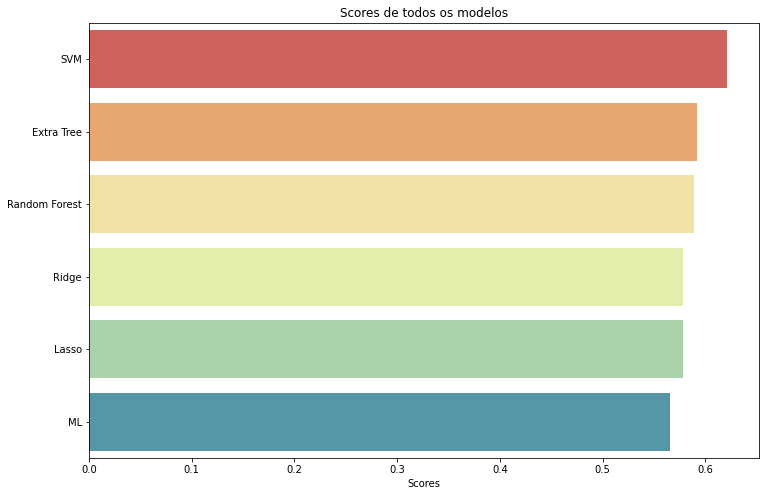

In [ ]:
scores_pred = [score_ml, score_l1, score_l2, score_svm, scores_rdf.mean(), scores_extr.mean()]
scores_label = ['ML', 'Lasso', 'Ridge', 'SVM', 'Random Forest', 'Extra Tree']

scores_table = pd.DataFrame(data=scores_pred, index=scores_label, columns=['Scores'])

scores_table = scores_table.sort_values(by=['Scores'], ascending=False)

plt.figure(figsize=(12,8))

sns.barplot(x='Scores', y=scores_table.index,
            orient = 'h',
            palette = 'Spectral',
            data=scores_table
            )

plt.title('Scores de todos os modelos')
plt.show()

Dos modelos selecionados acima temos que o SVM com o kernel rbf teve um melhor desempenho em relação aos demais. A métrica escolhida foi o R2 score, e para o modelo que melhor performou o valor dessa métrica foi de 62%. 

## Conclusão

Quando temos que predizer a manutenção de uma máquina atráves de machine learning, existem três técnicas que são comumentes utilizadas. A primeira delas é a técnica de regressão, que tem uma vantagem em informar quando a falha irá ocorrer, mas precisa de uma quantidade de dados relativamente maior.

A segunda técnica é a de classificação, que prediz uma probabilidade se irá ocorrer uma falha em um intervalo de tempo. Essa técnica geralmente tem modelos que apresentam uma acurácia melhor e com menos dados do que o modelo anterior, porém entrega uma resposta booleana. 

Já a terceira técnica é para identificar comportamentos anormais nos dados, sendo esses dados não supervisionados. 

A estratégia escolhida para encontrar quantos ciclos cada motor ainda possui até a falha, foi a de análise de regressão para encontrar o remaining useful life (RUL). 

Após a escolha dos modelos foi feito um modelo **baseline que teve o score de 57%**.

E para realizar o feature engineering das variáveis foram utilizadas duas abordagens, o heatmap e uma arvore de decisão. As variáveis com maiores importância foram **sensor_11, sensor_9, sensor_4, sensor_7, sensor_12, sensor_14, sensor_15, sensor_21**. 

Para retirar os ruídos dos dados foi proposto a padronização pela função StandardScale, porém não foi notada nenhuma alteração na performance dos modelos. É necessário a utilização de outra técnica para a retirada do ruído.  

Fizemos a análise com seis diferentes modelos, sendo que o de melhor performance foi o Support Vector Machine com kernel rbf. A métrica utilizada foi o R2 score, e o valor do melhor modelo foi de **62%**.

